In [21]:
# standard library packages
import os

# 3rd party packages
from dotenv import load_dotenv
import pandas as pd
import numpy as np
import praw

from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt

# our own packages
import gpa_ranking.ranking as rk

In [2]:
load_dotenv("../reddit.env")

True

In [9]:
reddit = praw.Reddit(
    client_id=os.environ.get("client_id"),
    client_secret=os.environ.get("client_secret"),
    user_agent=os.environ.get("user_agent"),
)

top_submissions = reddit.subreddit("Stoicism").new(limit=100)

In [10]:
list_submissions = [
    {
        "title": sub.title,
        "ups": sub.ups,
        "downs": sub.downs,
        "visited": sub.visited
    }
    for sub in top_submissions
    if not sub.stickied
]
df_submissions = pd.DataFrame(list_submissions)
df_submissions.head()

,title,ups,downs,visited
0,What's the best way to go about retaining the ...,1,0,False
1,Books / Resources on Leadership / Management a...,1,0,False
2,A Stoics response to willful ignorance,0,0,False
3,"Desire, time and change, and a potentially new...",2,0,False
4,How to deal with emotional pain from unrecipro...,7,0,False


In [15]:
posterior_mean, std_err  = rk.intervals(
    df_submissions["ups"], df_submissions["downs"]
)
lb = posterior_mean - std_err

In [16]:
df = df_submissions.assign(
    post_mean = posterior_mean,
    std_err = std_err,
    lb = lb,
).sort_values(by="lb", ascending=False).head(30)

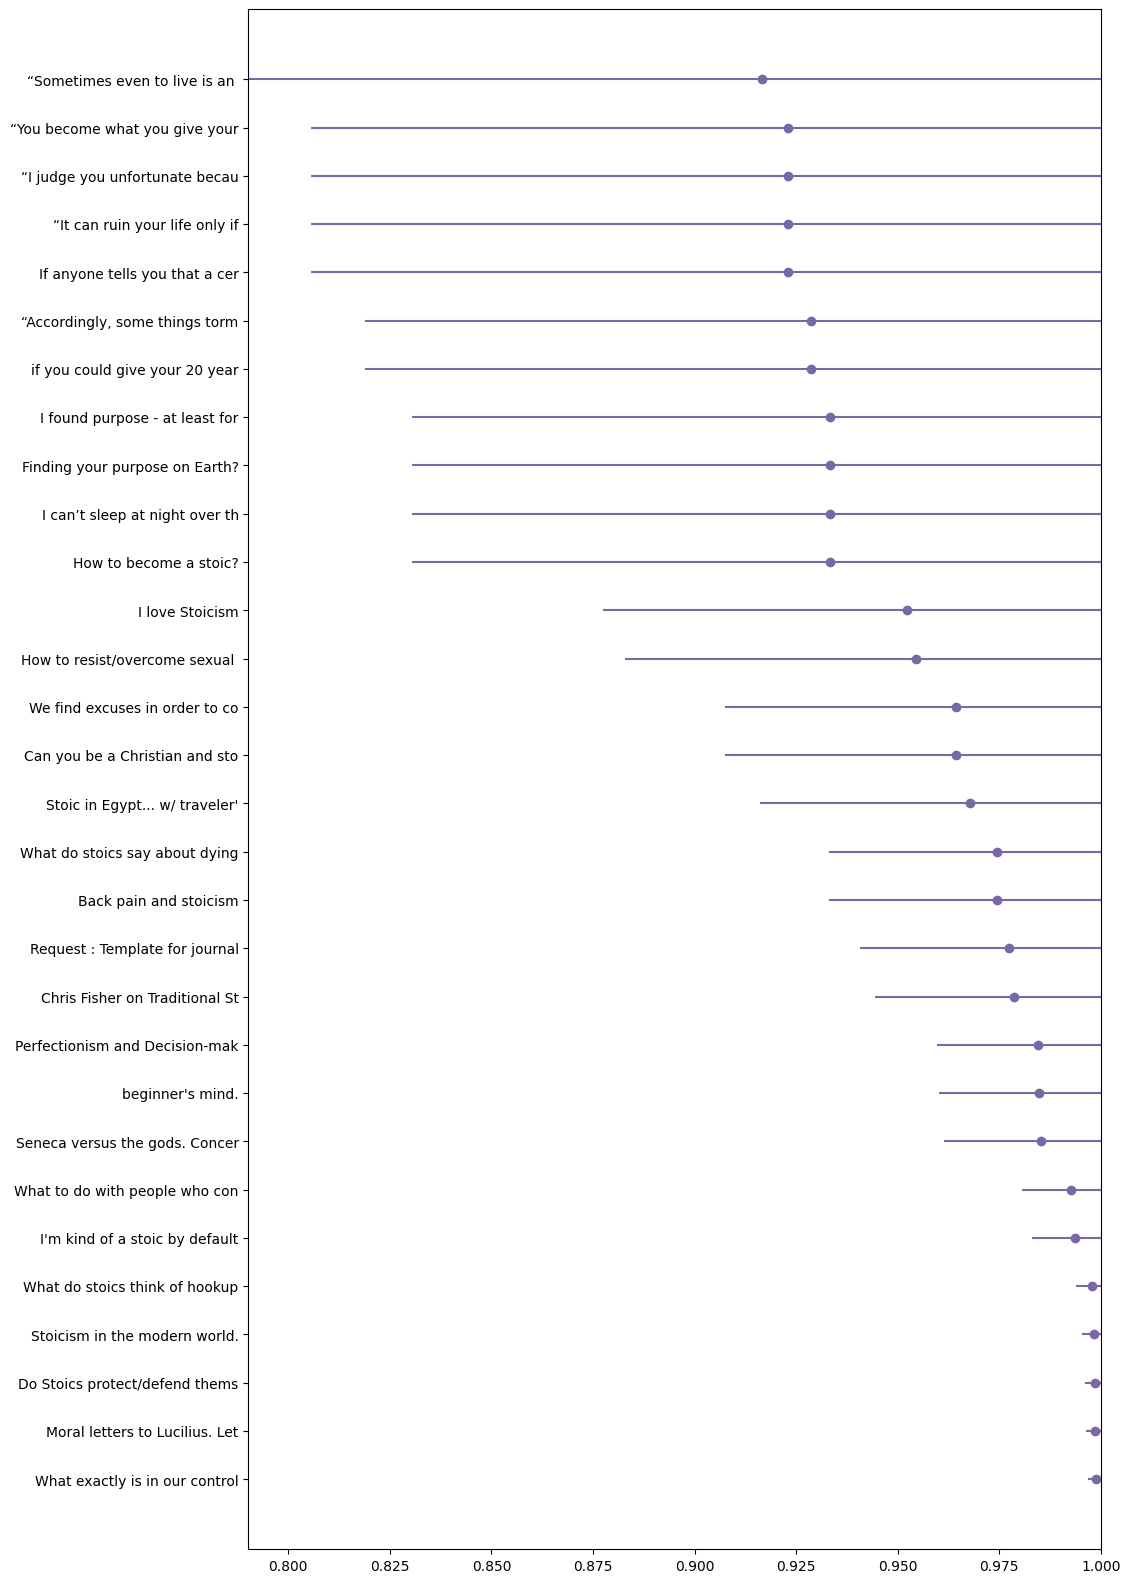

In [22]:
figsize(11, 20)
plt.errorbar( df["post_mean"], np.arange(len(df)), 
               xerr=df["std_err"], capsize=0, fmt="o",
                color = "#7A68A6")
plt.xlim( df["lb"].min(), 1)
plt.yticks( np.arange( len(df) - 1,-1,-1 ), map( lambda x: x[:30].replace("\n",""), df["title"]) );
